# Thinkful Data Science Prep Capstone

## Chicago: Brief Examination of Health Statistics of the City of Neighborhoods


### Overview:
When studying health and mortality, there are highly discussed causes of death which are cancer, diabetes, and stroke (often connected to cardiovascular health).  In Chicago, we have highly-publicized gunfire deaths.  Further study may help categorize this as a public health concern.  Chicago is also known as the city of neighborhoods—77 in fact.  We will briefly examine our Chicago neighborhoods and the economic factors which may affect our health including gun deaths.


__Content and Context__<br>
This is a dataset hosted by the City of Chicago. The city has an open data platform found at this [link](https://data.cityofchicago.org/) and they update their information according the amount of data that is brought in. Explore the City of Chicago using Kaggle and all of the data sources available through the City of Chicago organization page.

Overall time period 2005-2011 [Link](https://www.kaggle.com/chicago/chicago-public-health-statistics) to Kaggle dataset. Follow this [link](https://aspe.hhs.gov/2011-poverty-guidelines-federal-register-notice) for 2011 poverty line information.

Update Frequency: This dataset is updated quarterly.

Acknowledgements: This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

This dataset is distributed under the following licenses: Public Domain

### The map below shows the seventy-seven Chicago neighborhoods and how they are grouped into nine communities

We will examine these areas below and will refer to as _nieghborhoods_ when addressing the seventy-seven different areas, and the geographic groupings will be referred to as _communities_.
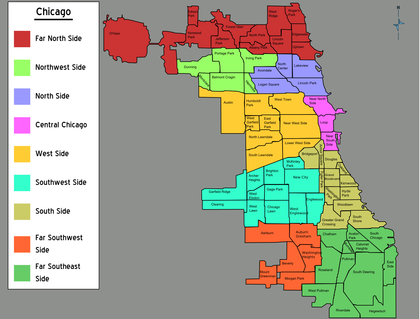





In [405]:
# Boilerplate 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
#load data and set notebook guides
df = pd.read_csv('public_health_statistics_chicago_community_area.csv')  

#2011 individual poverty level, previously cited
poverty_line= 10890

# Color guide
#003f5c  #58508d  #bc5090  #ff6361  #ffa600

In [407]:
# drop extraneous columns
df1 = df.drop(columns=['Prostate Cancer in Males','Birth Rate','General Fertility Rate', 'Low Birth Weight','Prenatal Care Beginning in First Trimester','Preterm Births', 'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females', 'Colorectal Cancer','Infant Mortality Rate',
 'Lung Cancer', 'Childhood Blood Lead Level Screening','Childhood Lead Poisoning','Gonorrhea in Females','Gonorrhea in Males','Tuberculosis','Crowded Housing'])

In [408]:
# rename columns
df2 = df1.rename(columns = {'Community Area':'Number', 'Community Area Name': 'Neighborhood', 'Cancer (All Sites)': 'Cancer','Diabetes-related': 'Diabetes', 'Firearm-related': 'Firearms', 'Stroke (Cerebrovascular Disease)': 'Stroke', 'Below Poverty Level':'Below_Poverty_Level','No High School Diploma': 'No_H.S._Diploma', 'Per Capita Income':'Per_Capita_Income'})

In [409]:
#Listing of column headings to verify and refer back to
list(df2)

['Number',
 'Neighborhood',
 'Cancer',
 'Diabetes',
 'Firearms',
 'Stroke',
 'Below_Poverty_Level',
 'Dependency',
 'No_H.S._Diploma',
 'Per_Capita_Income',
 'Unemployment']

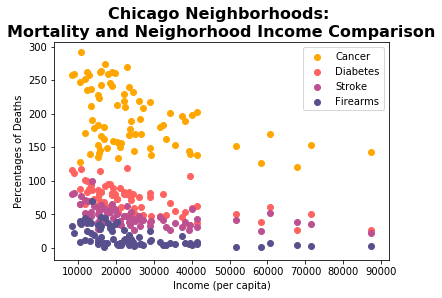

In [410]:
fig, ax = plt.subplots()

# Drawing the graph
ax.scatter(df2['Per_Capita_Income'], df2['Cancer'], color="#ffa600")
ax.scatter(df2['Per_Capita_Income'], df2['Diabetes'], color="#ff6361")
ax.scatter(df2['Per_Capita_Income'], df2['Stroke'], color="#bc5090")
ax.scatter(df2['Per_Capita_Income'], df2['Firearms'], color="#58508d")

# Set the label for the x-axis
ax.set_xlabel("Income (per capita)")

# Set the label for the y-axis
ax.set_ylabel("Percentages of Deaths")

ax.set_title("Chicago Neighborhoods: \nMortality and Neighorhood Income Comparison", fontsize=16, fontweight = "bold")
ax.legend()

plt.show()

### Chicago Neighborhoods: Mortality and Neighorhood Income Comparison

The graph above gives a high level look into the main health factors as compared to Chicago incomes. Overall the lower the income level, it appears the higher the mortality rate. It is also apparant that higher or at the very least what maybe considered middle class (income of $45,000 or higher according to the [Pew Research Center](http://www.pewresearch.org/fact-tank/2018/09/06/are-you-in-the-american-middle-class/)), is __significantly less common__ in Chicago neighborhoods.  Those same six neighborhoods with higher incomes have lower mortality rates due to the health statitics studied--Cancer, Diabetes, Stroke, and Firearms.

We break out the individual health factors below for further examination by neighborhood.

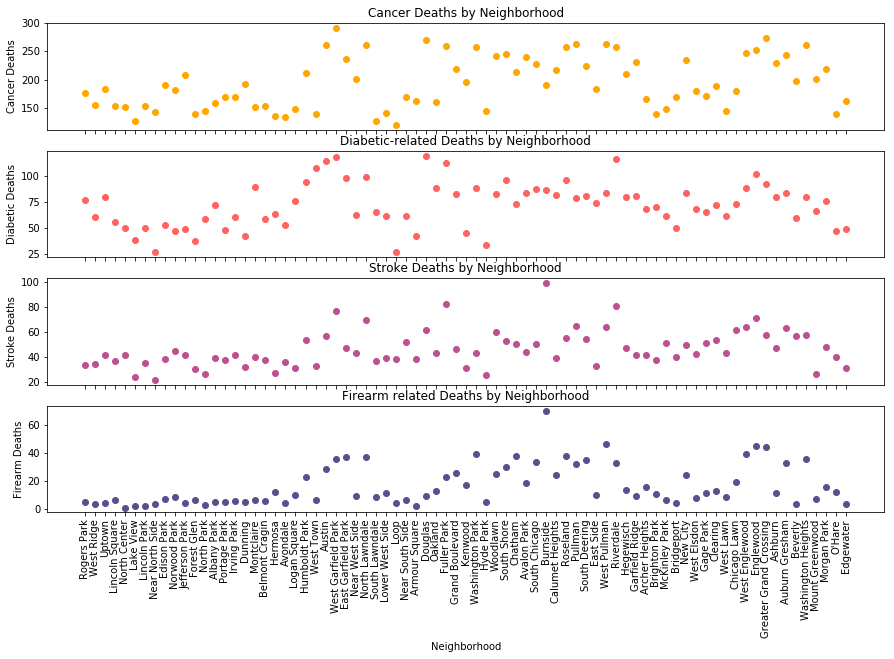

In [411]:
plt.figure(figsize=(15,9))

#Cancer info
plt.subplot(4, 1, 1)
plt.scatter(df2["Neighborhood"],df2["Cancer"], color="#ffa600")
plt.title('Cancer Deaths by Neighborhood')
plt.ylabel('Cancer Deaths')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])
#cur_axes.axes.get_yaxis().set_ticklabels([])

#Diabetic info
plt.subplot(4, 1, 2)
plt.scatter(df2["Neighborhood"],df2['Diabetes'], color="#ff6361")
#plt.xlabel("Neighborhood")
plt.ylabel("Diabetic Deaths")
plt.xticks(rotation=80)
plt.title('Diabetic-related Deaths by Neighborhood')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Stroke info
plt.subplot(4, 1, 3)
plt.scatter(df2["Neighborhood"],df2['Stroke'], color="#bc5090")
#plt.xlabel("Neighborhood")
plt.ylabel('Stroke Deaths')
plt.xticks(rotation=80)
plt.title('Stroke Deaths by Neighborhood')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Firearm info
plt.subplot(4, 1, 4)
plt.scatter(df2["Neighborhood"],df2['Firearms'], color="#58508d")
plt.xlabel("Neighborhood")
plt.ylabel("Firearm Deaths")
plt.xticks(rotation=90)
plt.title('Firearm related Deaths by Neighborhood')
#cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

plt.show()

### Snapshot: Mortality by Neighborhood

At first glance, it appears cancer is fairly eveningly spread across the Chicago region.  There are several neighborhoods that experience very low firearm deaths, but there are significant spikes in other neighborhoods. Burnside is area is highest for both stroke and firearms death.  In fact, the stroke pattern and firearm pattern of scatterplots are similar.

This snapshot is still noisy and can be too much to process, so below we will group the 77 neighborhoods into the 9 community areas of Chicago and further study the health statistics.

In [412]:
# Set the index as the city designated neighborhood number
df2.set_index("Number", inplace=True)

In [413]:
# Aggregation of neighborhoods into city community area
df2['Community'] = '***'


df2.loc[[8, 32, 33], 'Community'] = 'Central'
df2.loc[[5,6,7,21,22], 'Community'] = 'Northside'
df2.loc[[1,2,3,4,9,10,11,12,13,14,76,77], 'Community'] = 'Far Northside'
df2.loc[[15,16,17,18,19,20], 'Community'] = 'Northwest'
df2.loc[[23,24,25,26,27,28,29,30,31], 'Community'] = 'Westside'
df2.loc[[34,35,36,37,38,39,40,41,42,43,60,69], 'Community'] = 'Southside'
df2.loc[[56,57,58,59,61,62,63,64,65,66,67,68], 'Community'] = 'Southwest'
df2.loc[[44,45,46,47,48,49,50,51,52,53,54,55], 'Community'] = 'Far Southeast'
df2.loc[[70,71,72,73,74,75], 'Community'] = 'Far Southwest'

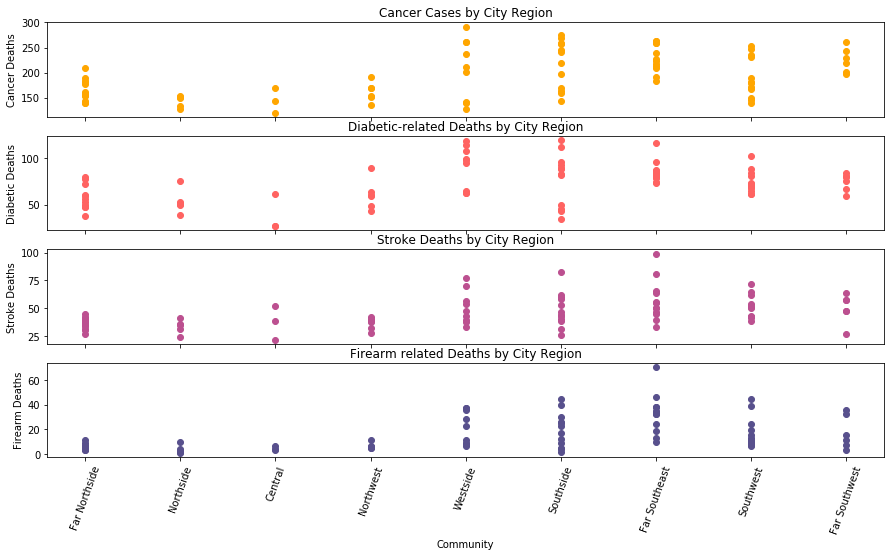

In [414]:
plt.figure(figsize=(15,8))

#Cancer info
plt.subplot(4, 1, 1)
plt.scatter(df2["Community"],df2["Cancer"], color="#ffa600")
plt.title('Cancer Cases by City Region')
plt.ylabel('Cancer Deaths')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])
#cur_axes.axes.get_yaxis().set_ticklabels([])

#Diabetic info
plt.subplot(4, 1, 2)
plt.scatter(df2["Community"],df2['Diabetes'], color="#ff6361")
#plt.xlabel("Community")
plt.ylabel("Diabetic Deaths")
plt.xticks(rotation=80)
plt.title('Diabetic-related Deaths by City Region')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Stroke info
plt.subplot(4, 1, 3)
plt.scatter(df2["Community"],df2['Stroke'], color="#bc5090")
#plt.xlabel("Community")
plt.ylabel('Stroke Deaths')
plt.xticks(rotation=80)
plt.title('Stroke Deaths by City Region')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Firearm info
plt.subplot(4, 1, 4)
plt.scatter(df2["Community"],df2['Firearms'], color="#58508d")
plt.xlabel("Community")
plt.ylabel("Firearm Deaths")
plt.xticks(rotation=70)
plt.title('Firearm related Deaths by City Region')
cur_axes.axes.get_xaxis().set_ticklabels([])

plt.show()

### Snapshot: Mortality by Community

By grouping geogrpahically, we can start to understand the impact of specific health issues in the areas of Chicago.  Cancer is not as evenly disbursed as originally assumed, and is a significant impact in the same communities that experince high deaths by gunfire.  Communities to the west and south have high mortality rates.

In [415]:
# Averages of Aggregated Communites

cancer_avg = df2["Cancer"].groupby(df2["Community"]).mean()
diabetes_avg = df2["Diabetes"].groupby(df2["Community"]).mean()
stroke_avg = df2["Stroke"].groupby(df2["Community"]).mean()
firearms_avg = df2["Firearms"].groupby(df2["Community"]).mean()

income_avg = df2["Per_Capita_Income"].groupby(df2["Community"]).mean()

# verify number of communities total
n_groups = df2['Community'].nunique()

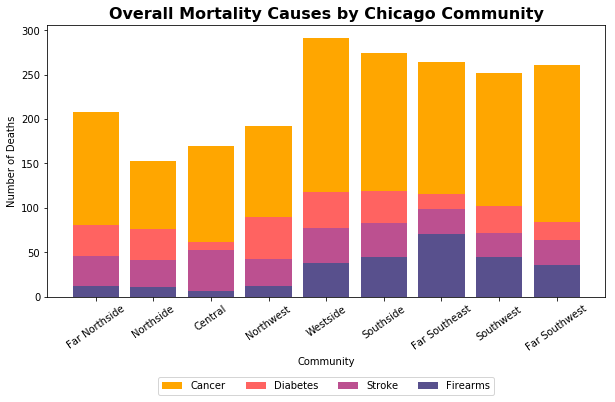

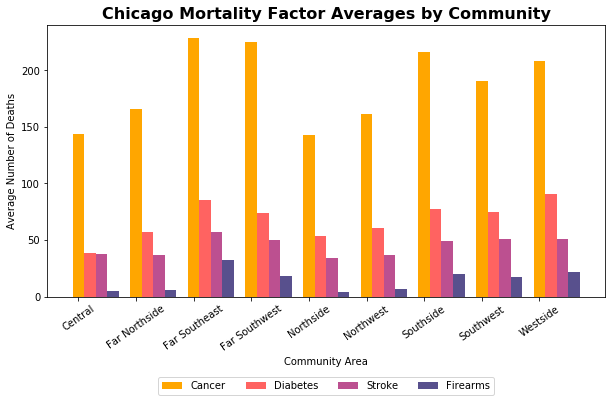

In [416]:
# First graph, stacked and number of deaths
#plt.figure(figsize=(10,5))

fig, ax = plt.subplots(figsize=(10,5))

#Cancer info
plt.bar(df2["Community"],df2["Cancer"], color="#ffa600", label="Cancer")
#Diabetic info
plt.bar(df2["Community"],df2['Diabetes'], color="#ff6361", label="Diabetes")
#Stroke info
plt.bar(df2["Community"],df2['Stroke'], color="#bc5090", label="Stroke")
#Firearm info
plt.bar(df2["Community"],df2['Firearms'], color="#58508d", label="Firearms")
#Chart labels
plt.xlabel("Community")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=35)
plt.title('Overall Mortality Causes by Chicago Community', fontsize=16, fontweight = "bold")

#plt.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.38),ncol=4)
plt.show()


#Second graph - averages grouped
fig, ax = plt.subplots(figsize=(10,5))

# set width of bar
barWidth = 0.20
 
# set height of bar by setting the average of each health stat mean
cancer_bars = np.array(cancer_avg)
diabetes_bars = np.array(diabetes_avg)
stroke_bars = np.array(stroke_avg)
firearms_bars = np.array(firearms_avg)

income_line = np.array(income_avg)

# Setting position of bar on X axis to group bars together by community area
position_1 = np.arange(len(cancer_bars))
position_2 = [x + barWidth for x in position_1]
position_3 = [x + barWidth for x in position_2]
position_4 = [x + barWidth for x in position_3]
 
# Making the plot
plt.bar(position_1, cancer_bars, color='#ffa600', width=barWidth, label='Cancer')
plt.bar(position_2, diabetes_bars, color='#ff6361', width=barWidth, label='Diabetes')
plt.bar(position_3, stroke_bars, color='#bc5090', width=barWidth, label='Stroke')
plt.bar(position_4, firearms_bars, color='#58508d', width=barWidth, label="Firearms")

# Adding labels and defining graph
plt.xlabel('Community Area')
plt.ylabel('Average Number of Deaths')
plt.title("Chicago Mortality Factor Averages by Community", fontsize=16, fontweight = "bold")
community_list = np.array(income_avg.index)
ax.set_xticks(np.arange(len(community_list)))
ax.set_xticklabels(community_list, rotation=35)
 
# Create legend & Show graphic
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.38),ncol=4)
plt.show()

### Overall Mortality Causes by Chicago Community

The Westside community has the overall highest number of deaths and the Northside has the lowest and the Far Southeast side has the highest number of gunfire deaths.  Northside and Central are both lowest for deaths and gunfire deaths.  The Central community has a uniquely low level of diabetes related deaths. 

Below we will take a look at the economic information for the city.

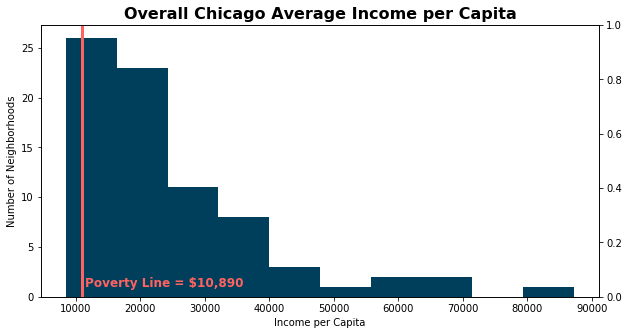

In [417]:
#plt.figure(figsize=(10,5))

fig, ax = plt.subplots(figsize=(10,5))

x = df2['Per_Capita_Income']
plt.hist(x, bins=10, color = "#003f5c")
plt.xlabel("Income per Capita")
plt.ylabel("Number of Neighborhoods")
plt.title("Overall Chicago Average Income per Capita", fontsize=16, fontweight = "bold")

# plot income line on same axis
ax2 = ax.twinx()
ax.axvline(poverty_line, linewidth=3,color="#ff6361")
ax.text(11500, 2, 'Poverty Line = $10,890', ha='left', va='top', color='#ff6361', fontweight = "bold", fontsize=12)
ax2.tick_params(labelright=True)

plt.show()

### Overall Chicago Average Income

The per capital income for the city of Chicago is skewed, with a significant amount of neighborhoods with members neear and below the poverty line.  The majority of Chicago survives at what is considered lower class (below $45000( 
Very few Chicago neighborhoods and the people experience income levels that would be considered middle class or higher.

In the next graph we will explore health factors and income.

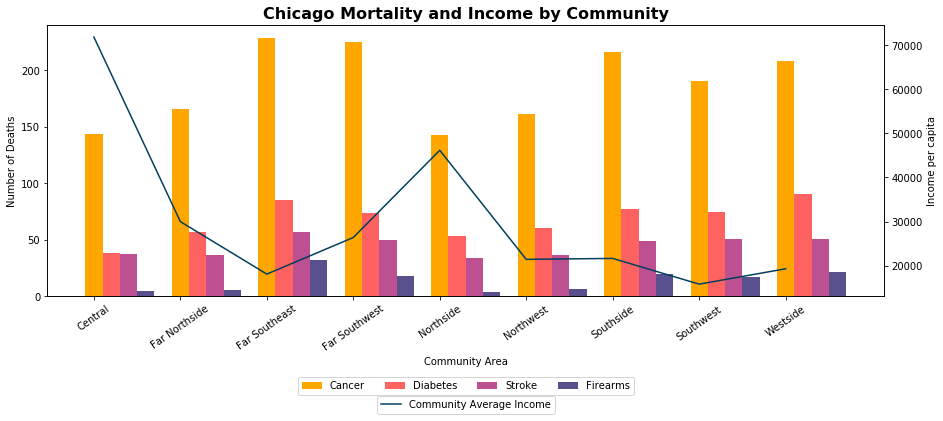

In [404]:
fig, ax = plt.subplots(figsize=(15,5))

# set width of bar
barWidth = 0.20
 
# set height of bar by setting the average of each health stat mean
cancer_bars = np.array(cancer_avg)
diabetes_bars = np.array(diabetes_avg)
stroke_bars = np.array(stroke_avg)
firearms_bars = np.array(firearms_avg)

income_line = np.array(income_avg)

# Setting position of bar on X axis to group bars together by community area
position_1 = np.arange(len(cancer_bars))
position_2 = [x + barWidth for x in position_1]
position_3 = [x + barWidth for x in position_2]
position_4 = [x + barWidth for x in position_3]
 
# Making the plot
cancer_bar = plt.bar(position_1, cancer_bars, color='#ffa600', width=barWidth, label='Cancer')
diabetes_bar = plt.bar(position_2, diabetes_bars, color='#ff6361', width=barWidth, label='Diabetes')
stroke_bar = plt.bar(position_3, stroke_bars, color='#bc5090', width=barWidth, label='Stroke')
firearms_bar = plt.bar(position_4, firearms_bars, color='#58508d', width=barWidth, label="Firearms")

 
# Adding labels and defining graph
plt.xlabel('Community Area')
plt.ylabel('Number of Deaths')
plt.title("Chicago Mortality and Income by Community", fontsize=16, fontweight='bold')
community_list = np.array(income_avg.index)
ax.set_xticks(np.arange(len(community_list)))
ax.set_xticklabels(community_list, rotation=35)

# plot income line on same axis
ax2 = ax.twinx()
income_plotline = plt.plot(income_line, label="Community Average Income", color='#003f5c')
plt.ylabel('Income per capita')


# Create legends & Show graphic
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.38),ncol=4)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -.45),ncol=4)
plt.show()

### Chicago Mortality and Income

The graph above strongly suggests a relationship between income and health risks that lead to death.  The communities that have the highest levels of income, Central and Northside, have the lowest deaths.  Likewise, the communities that experience high mortality, specifically due to violence/gunfire, have the lowest levels of income.


### Conclusion and recommendation for further research.

__Death by gunfire is a health issue, but not the highest cause of death evenly throughout the city.__
Despite the news headlines, cancer is a higher cause of death than gunfire. However, all rates of mortality are lower when residence have a higher access to economic resources. It is unknown if this is due to preventative lifestyle expenditures, access to early disease detection, or quality of medical access. 

What is evident is where you live impacts your health.  Health risks and mortality rate do have a relationship with income levels.  This brief examination begs further study.

Nieghborhood density needs to be further explored as well as employment levels.  The Central community is comprised of three neighborhoods and includes the downtown area.  What is the population density for that area, and would it level out with the other communities?

What areas have access to healthcare and what is the quality of care? What are the factors that drive income down?  Are people unable to access certain neighborhoods due to cost of living--like rent? These questions could help Chicago citizens understand the factors that impact their city, and help us create solutions.